In [1]:
# https://medium.com/elliptic/the-elliptic-data-set-opening-up-machine-learning-on-the-blockchain-e0a343d99a14#:~:text=GCN%20are%20a,neural%20network%20architecture.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'matplotlib'

In [ ]:
df_classes = pd.read_csv('elliptic_txs_classes.csv')
df_edges = pd.read_csv('elliptic_txs_edgelist.csv')
df_features = pd.read_csv('elliptic_txs_features.csv',header=None)

In [4]:
df_classes

,txId,class
0,230425980,unknown
1,5530458,unknown
2,232022460,unknown
3,232438397,2
4,230460314,unknown
...,...,...
203764,173077460,unknown
203765,158577750,unknown
203766,158375402,1
203767,158654197,unknown


In [5]:
df_classes['class'].value_counts()

unknown    157205
2           42019
1            4545
Name: class, dtype: int64

In [6]:
df_classes.loc[df_classes['class'] == 'unknown','class'] = 3

In [7]:
df_features.columns = ['txId', 'time step']+[f'transaction_feature_{i}' for i in range(93)]+[f"aggregate_feature_{i}" for i in range(72)]
df_features

,txId,time step,transaction_feature_0,transaction_feature_1,transaction_feature_2,transaction_feature_3,transaction_feature_4,transaction_feature_5,transaction_feature_6,transaction_feature_7,...,aggregate_feature_62,aggregate_feature_63,aggregate_feature_64,aggregate_feature_65,aggregate_feature_66,aggregate_feature_67,aggregate_feature_68,aggregate_feature_69,aggregate_feature_70,aggregate_feature_71
0,230425980,1,-0.171469,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162097,...,-0.562153,-0.600999,1.461330,1.461369,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
1,5530458,1,-0.171484,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162112,...,0.947382,0.673103,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
2,232022460,1,-0.172107,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162749,...,0.670883,0.439728,-0.979074,-0.978556,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792
3,232438397,1,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,12.414558,-0.163645,...,-0.577099,-0.613614,0.241128,0.241406,1.072793,0.085530,-0.131155,0.677799,-0.120613,-0.119792
4,230460314,1,1.011523,-0.081127,-1.201369,1.153668,0.333276,1.312656,-0.061584,-0.163523,...,-0.511871,-0.400422,0.517257,0.579382,0.018279,0.277775,0.326394,1.293750,0.178136,0.179117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203764,173077460,49,-0.145771,-0.163752,0.463609,-0.121970,-0.043875,-0.113002,-0.061584,-0.135803,...,-0.577099,-0.613614,0.241128,0.241406,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
203765,158577750,49,-0.165920,-0.123607,1.018602,-0.121970,-0.043875,-0.113002,-0.061584,-0.156418,...,0.162722,0.010822,1.461330,1.461369,-0.098889,-0.087490,-0.084674,-0.140597,-1.760926,-1.760984
203766,158375402,49,-0.172014,-0.078182,1.018602,0.028105,-0.043875,0.054722,-0.061584,-0.163626,...,1.261246,1.985050,1.461330,1.461369,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
203767,158654197,49,-0.172842,-0.176622,1.018602,-0.121970,-0.043875,-0.113002,-0.061584,-0.163501,...,-0.397749,-0.411776,1.461330,1.461369,-0.098889,-0.087490,-0.084674,-0.140597,1.519700,1.521399


In [8]:
df_merged = pd.merge(df_features,df_classes, on='txId', how='left')
df_merged

,txId,time step,transaction_feature_0,transaction_feature_1,transaction_feature_2,transaction_feature_3,transaction_feature_4,transaction_feature_5,transaction_feature_6,transaction_feature_7,...,aggregate_feature_63,aggregate_feature_64,aggregate_feature_65,aggregate_feature_66,aggregate_feature_67,aggregate_feature_68,aggregate_feature_69,aggregate_feature_70,aggregate_feature_71,class
0,230425980,1,-0.171469,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162097,...,-0.600999,1.461330,1.461369,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,3
1,5530458,1,-0.171484,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162112,...,0.673103,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,3
2,232022460,1,-0.172107,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162749,...,0.439728,-0.979074,-0.978556,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792,3
3,232438397,1,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,12.414558,-0.163645,...,-0.613614,0.241128,0.241406,1.072793,0.085530,-0.131155,0.677799,-0.120613,-0.119792,2
4,230460314,1,1.011523,-0.081127,-1.201369,1.153668,0.333276,1.312656,-0.061584,-0.163523,...,-0.400422,0.517257,0.579382,0.018279,0.277775,0.326394,1.293750,0.178136,0.179117,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203764,173077460,49,-0.145771,-0.163752,0.463609,-0.121970,-0.043875,-0.113002,-0.061584,-0.135803,...,-0.613614,0.241128,0.241406,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,3
203765,158577750,49,-0.165920,-0.123607,1.018602,-0.121970,-0.043875,-0.113002,-0.061584,-0.156418,...,0.010822,1.461330,1.461369,-0.098889,-0.087490,-0.084674,-0.140597,-1.760926,-1.760984,3
203766,158375402,49,-0.172014,-0.078182,1.018602,0.028105,-0.043875,0.054722,-0.061584,-0.163626,...,1.985050,1.461330,1.461369,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,1
203767,158654197,49,-0.172842,-0.176622,1.018602,-0.121970,-0.043875,-0.113002,-0.061584,-0.163501,...,-0.411776,1.461330,1.461369,-0.098889,-0.087490,-0.084674,-0.140597,1.519700,1.521399,3


In [9]:
# numeric_features = [feature for feature in df_merged.columns if df_merged[feature].dtype != 'O']
# categorical_features = [feature for feature in df_merged.columns if df_merged[feature].dtype == 'O']
# len(numeric_features), len(categorical_features)

<BarContainer object of 3 artists>

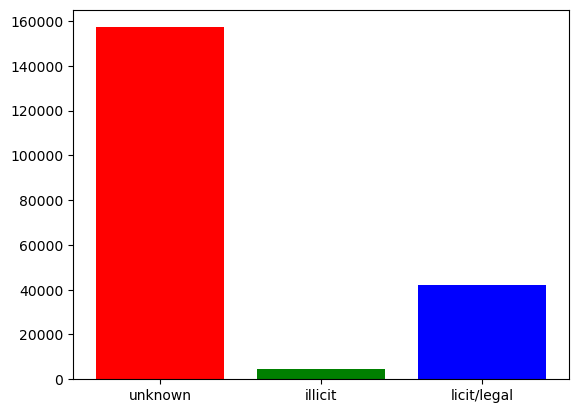

In [10]:
target = df_merged.groupby('class').count()
plt.bar(['unknown','illicit','licit/legal'],target['txId'].values, color=['r','g','b'])

In [11]:
# df_merged.to_csv('MLP_merged.csv')

In [12]:

print('Shape of classes', df_classes.shape)
print('Shape of edges', df_edges.shape)
print('Shape of features', df_features.shape)

print('Shape of merged dataframe', df_merged.shape)

Shape of classes (203769, 2)
Shape of edges (234355, 2)
Shape of features (203769, 167)
Shape of merged dataframe (203769, 168)


In [13]:
df = df_merged.drop(df_merged[df_merged['class']==3].index)

In [14]:
df.isna().sum().value_counts()

0    168
dtype: int64

In [15]:
df.shape

(46564, 168)

In [16]:
# df.to_csv('MLP_training_set.csv')

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier

# df = pd.read_pickle('MLP.pkl')
X=df.drop("class", axis=1)
y=df["class"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.3,random_state =42)
clf = LazyClassifier(predictions=True)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
print(models)

ModuleNotFoundError: No module named 'pandas'

In [18]:
from sklearn.model_selection import train_test_split
X=df.drop("class", axis=1)
y=df["class"].apply(lambda x: 0 if x == '2' else 1 )
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.3,random_state =42)

In [19]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(32594, 167)
(32594,)
(13970, 167)
(13970,)


## Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [29]:
from sklearn.metrics import log_loss
log_loss(y_test,y_pred)

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.9856836077308518
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     12587
           1       1.00      0.86      0.92      1383

    accuracy                           0.99     13970
   macro avg       0.99      0.93      0.96     13970
weighted avg       0.99      0.99      0.99     13970

[[12584     3]
 [  197  1186]]


## for batch prediction

In [22]:
batch_pred = df_merged.drop(df_merged[df_merged['class'] != 3].index)
bp_input = batch_pred.drop('class', axis=1)
y_pred_bp=clf.predict(bp_input)
pd.DataFrame(y_pred_bp).value_counts()

0    149555
1      7650
dtype: int64

## Light GBM

In [26]:
from lightgbm import LGBMClassifier
model = LGBMClassifier()
model.fit(X_train,y_train)
y_pred_lgbm = model.predict(X_test)

In [27]:
from sklearn.metrics import log_loss
log_loss(y_test,y_pred_lgbm)

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(accuracy_score(y_test,y_pred_lgbm))
print(classification_report(y_test, y_pred_lgbm))
print(confusion_matrix(y_test, y_pred_lgbm))

0.990909090909091
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     12587
           1       0.99      0.92      0.95      1383

    accuracy                           0.99     13970
   macro avg       0.99      0.96      0.97     13970
weighted avg       0.99      0.99      0.99     13970

[[12577    10]
 [  117  1266]]


In [2]:
d = pd.read_csv("/config/workspace/MLP_training_set.csv")

In [3]:
d.to_pickle("MLP_training_dataset.pkl")